In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/workspaces/StrataScratchDataProjects/Inflation Expectations Analysis/T10YIE.csv')

In [3]:
df.head()

,observation_date,T10YIE
0,2020-10-05,1.68
1,2020-10-06,1.66
2,2020-10-07,1.71
3,2020-10-08,1.72
4,2020-10-09,1.73


In [3]:
df['observation_date'] = pd.to_datetime(df['observation_date'])
df = df.sort_values('observation_date').set_index('observation_date')
df.head()

,T10YIE
observation_date,
2020-10-05,1.68
2020-10-06,1.66
2020-10-07,1.71
2020-10-08,1.72
2020-10-09,1.73


Moving Averages (Trend Detection)

30-day MA → short-term sentiment

180-day MA → long-term inflation expectations

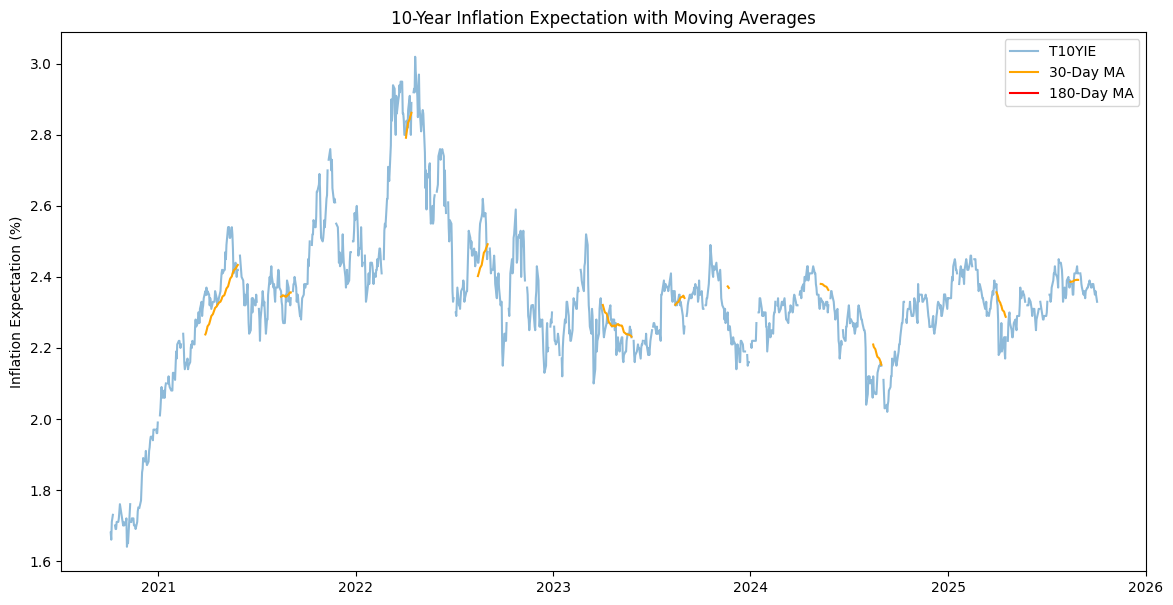

In [8]:
df['MA_30'] = df['T10YIE'].rolling(window=30).mean()
df['MA_180'] = df['T10YIE'].rolling(window=180).mean()

plt.figure(figsize=(14, 7))
plt.plot(df.index,df['T10YIE'],alpha=0.5,label='T10YIE')
plt.plot(df.index,df['MA_30'],label='30-Day MA',color='orange')
plt.plot(df.index,df['MA_180'],label='180-Day MA',color='red')
plt.title('10-Year Inflation Expectation with Moving Averages')
plt.ylabel('Inflation Expectation (%)')
plt.legend()
plt.show()

Interpretation

2020–2021: MA30 crosses above MA180 → inflation expectations accelerating

2022: Persistent elevation confirms structural inflation shock

2023 onward: MA30 falls below MA180 → disinflation & stabilization

Year-over-Year Change (Momentum Analysis)

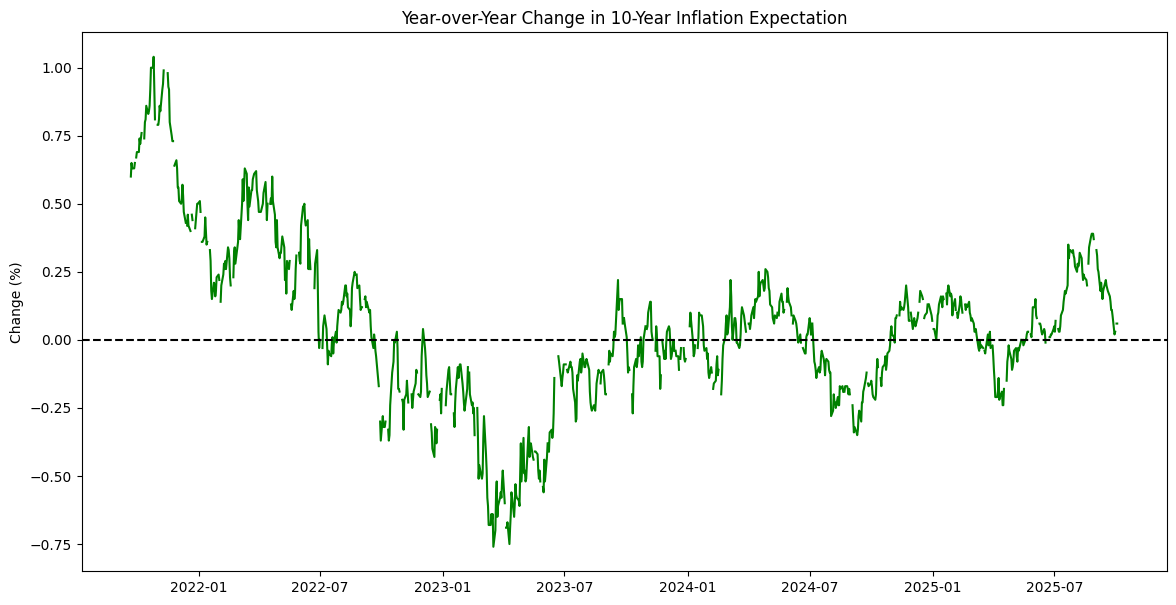

In [9]:
df['YoY_Change'] = df['T10YIE'] - df['T10YIE'].shift(252)

plt.figure(figsize=(14, 7))
plt.plot(df.index,df['YoY_Change'],color='green')
plt.axhline(0, color='black', linestyle='--')
plt.title('Year-over-Year Change in 10-Year Inflation Expectation')
plt.ylabel('Change (%)')
plt.show()

Interpretation

Positive spikes (2021–2022): Rapid inflation acceleration

Sharp decline (late 2022–2023): Effectiveness of monetary tightening

Near zero (2024–2025): Inflation expectations re-anchored

Bollinger Bands (Volatility & Extremes)

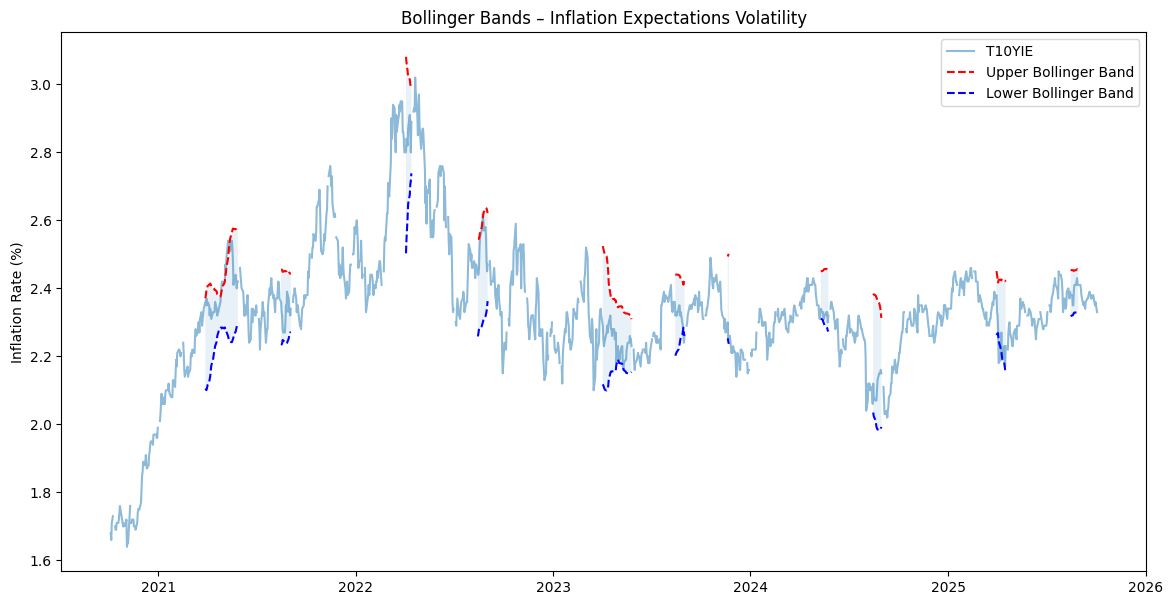

In [11]:
rolling_mean = df['T10YIE'].rolling(30).mean()
rolling_std = df['T10YIE'].rolling(30).std()

df['BB_Upper'] = rolling_mean + (rolling_std * 2)
df['BB_Lower'] = rolling_mean - (rolling_std * 2)

plt.figure(figsize=(14, 7))
plt.plot(df.index,df['T10YIE'],label='T10YIE',alpha=0.5)
plt.plot(df.index,df['BB_Upper'],linestyle='--',color='red',label='Upper Bollinger Band')
plt.plot(df.index,df['BB_Lower'],linestyle='--',color='blue',label='Lower Bollinger Band')
plt.fill_between(df.index, df['BB_Lower'], df['BB_Upper'], alpha=0.1)
plt.title('Bollinger Bands – Inflation Expectations Volatility')
plt.ylabel('Inflation Rate (%)')
plt.legend()
plt.show()

Interpretation

2022: Multiple band breakouts → extreme uncertainty (war + inflation shock)

2023–2025: Bands narrow → normalization & policy credibility restored